In [1]:
import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import scipy.misc

<IPython.core.display.Javascript object>


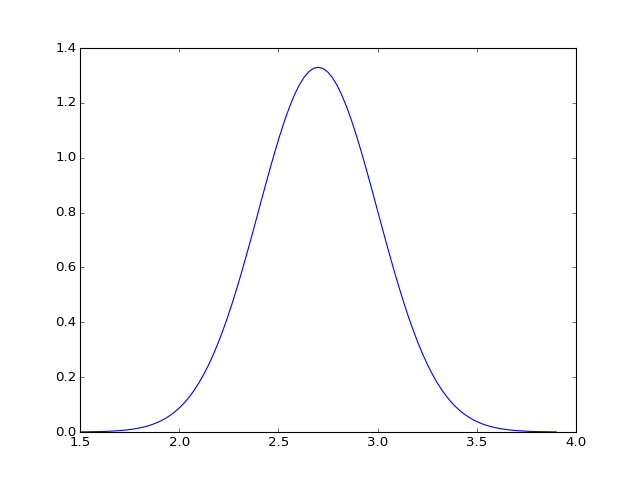

In [2]:
mu=2.7
sigma=0.3
num_sigmas=4
n=101

low = mu - num_sigmas*sigma
high = mu + num_sigmas*sigma
x=np.linspace(low, high, n)
prior=scipy.stats.norm.pdf(x,mu, sigma)
plt.figure()
plt.plot(x,prior)
prior=prior/prior.sum()

def likelihood(k,lam):
    return (lam)**k * np.exp(-lam) / scipy.misc.factorial(k)


<IPython.core.display.Javascript object>


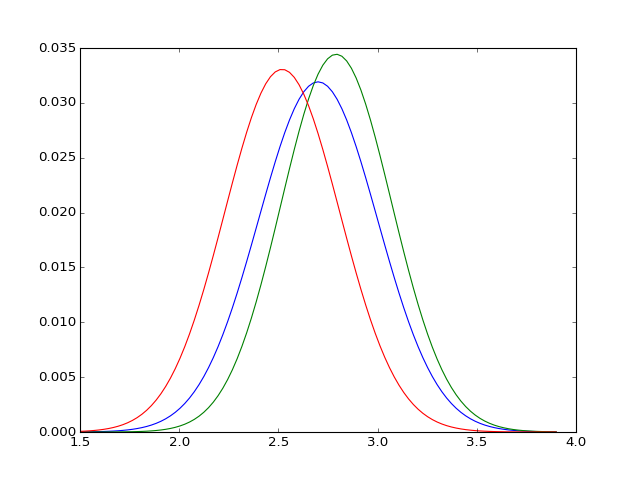

In [3]:
posterior1=prior.copy()
for result in [0, 2, 8,4]:
    for i in range(len(prior)):
        posterior1[i]=posterior1[i]*likelihood(result,x[i])
posterior1=posterior1/posterior1.sum()
        
posterior2=prior.copy()
for result in [1, 3, 1, 0]:
    for i in range(len(prior)):
        posterior2[i]=posterior2[i]*likelihood(result,x[i])

posterior2=posterior2/posterior2.sum()

plt.figure()
plt.plot(x,prior)
plt.plot(x,posterior1)
plt.plot(x,posterior2)

<IPython.core.display.Javascript object>


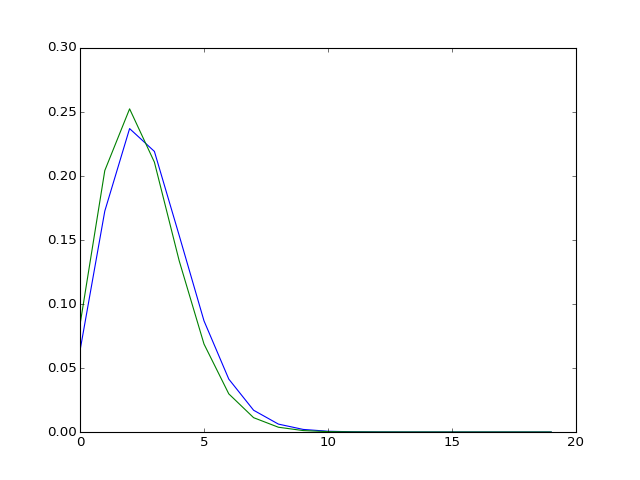

In [4]:
#Distribution of goals

goals=np.arange(20.)
probability1=goals*0
probability2=goals*0

for i in range(len(goals)):
    probability1[i]=(scipy.stats.poisson.pmf(goals[i],x)*posterior1).sum()
    probability2[i]=(scipy.stats.poisson.pmf(goals[i],x)*posterior2).sum()

plt.figure()
plt.plot(goals,probability1)
plt.plot(goals,probability2)

<IPython.core.display.Javascript object>


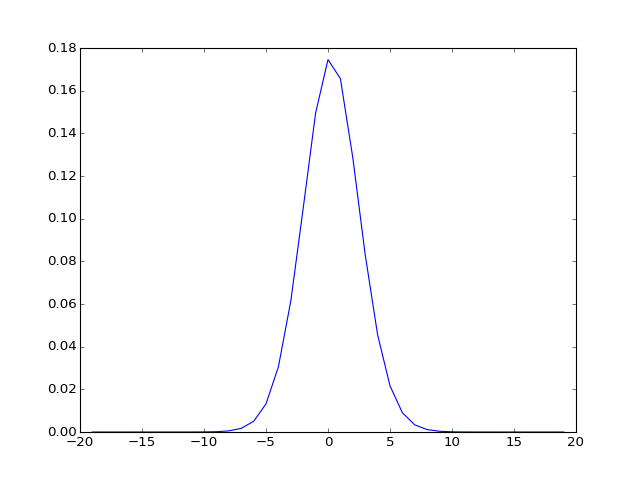

0.174574957837
0.458514508502
0.36691053356


In [16]:
goalsdiff=np.arange(-19.,20.)
goalsdiffprob=goalsdiff*0
for i in range(len(goals)):
    for j in range(len(goals)):
        diff=(goals[i]-goals[j])
        goalsdiffprob[goalsdiff==diff]+=probability1[i]*probability2[j]
        
plt.figure()
plt.plot(goalsdiff,goalsdiffprob)
print goalsdiffprob[goalsdiff==0].sum() #Draw
print goalsdiffprob[goalsdiff>0].sum()  #Team 1 scores more
print goalsdiffprob[goalsdiff<0].sum()  #Team 2 scores more

<IPython.core.display.Javascript object>


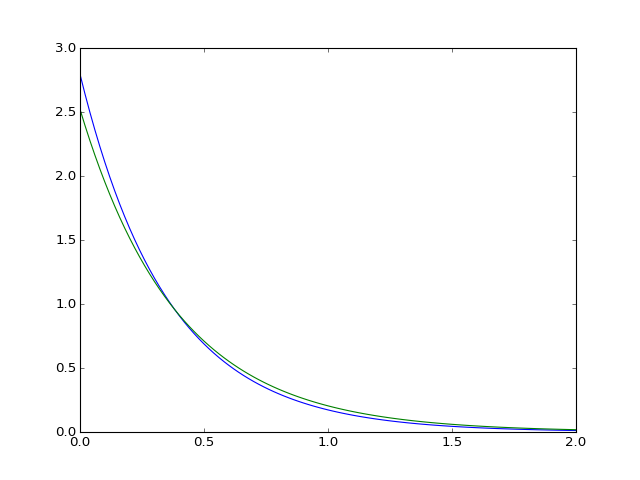

<IPython.core.display.Javascript object>


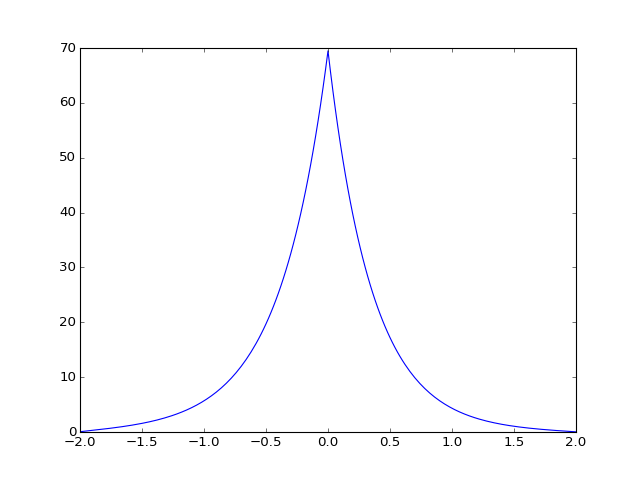

0.474589236527
0.525410763473


In [18]:
timenextgoal=np.linspace(0,2,101)
timenextgoalprob1=timenextgoal*0
timenextgoalprob2=timenextgoal*0

for i in range(len(timenextgoal)):
    timenextgoalprob1[i]=(x*np.exp(-timenextgoal[i]*x)*posterior1).sum()
    timenextgoalprob2[i]=(x*np.exp(-timenextgoal[i]*x)*posterior2).sum()
    
plt.figure()
plt.plot(timenextgoal,timenextgoalprob1)
plt.plot(timenextgoal,timenextgoalprob2)


timenextgoaldiff=np.linspace(-2,2,201)
timenextgoaldiffprob=timenextgoaldiff*0
for i in range(len(timenextgoal)):
    for j in range(len(timenextgoal)):
        diff=(timenextgoal[i]-timenextgoal[j])
        ind=np.argmin(np.abs(diff-timenextgoaldiff))
        timenextgoaldiffprob[ind]+=timenextgoalprob1[i]*timenextgoalprob2[j]
        
plt.figure()
plt.plot(timenextgoaldiff,timenextgoaldiffprob)

probA=timenextgoaldiffprob[timenextgoaldiff>0].sum()
probB=timenextgoaldiffprob[timenextgoaldiff<0].sum()

probAnorm=probA/(probA+probB)
probBnorm=probB/(probA+probB)
print probAnorm #Team 2 scores first
print probBnorm #Team 1 scores first

In [19]:
probWin1=goalsdiffprob[goalsdiff>0].sum()+goalsdiffprob[goalsdiff==0].sum()*probBnorm
probWin2=goalsdiffprob[goalsdiff<0].sum()+goalsdiffprob[goalsdiff==0].sum()*probAnorm

print probWin1,probWin2

0.550238070382 0.449761929517


In [21]:
probWin1All=probWin1*probWin1*probWin1+3*probWin1*probWin1*probWin2
probWin2All=probWin2*probWin2*probWin2+3*probWin2*probWin2*probWin1
print probWin1All,probWin2All

0.575103517395 0.424896482302
